# DDPQ

Here I will use deep deterministic policy gradients (DDPG) to train on the reaching environment with a single agent

---

In this notebook, I use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np
from collections import deque
import matplotlib.pyplot as plt

from ddpg_agent import Agent

In [2]:
env = UnityEnvironment(file_name='Reacher_Windows_x86_64/Reacher.exe')
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# create agent
agent = Agent(state_size=33, action_size=4, random_seed=2)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [3]:
n_episodes = 500
scores = []
scores_deque = deque(maxlen=100)
for i_episode in range(n_episodes):
    env_info = env.reset(train_mode=True)[brain_name]     # reset the environment    
    state = env_info.vector_observations                  # get the current state (for each agent)
    agent.reset()
    score = np.zeros(20)                                          # initialize the score (for each agent)
    for t in range(2000):
        action = agent.act(state) # select an action (for each agent)
        env_info = env.step(action)[brain_name]           # send all actions to tne environment
        # unpack environment variables
        next_state = env_info.vector_observations         # get next state (for each agent)
        reward = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        score += env_info.rewards                         # update the score (for each agent)
        agent.step(state, action, reward, next_state, dones)
        state = next_state                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    scores.append(score)
    scores_deque.append(score)

    # print status every 20 episodes
    if i_episode %20 == 0:
        print('\rEpisode {}\tAverage Score: {:2f}'.format(i_episode, np.mean(scores_deque)))

Episode 0	Average Score: 0.599500
Episode 20	Average Score: 1.048952
Episode 40	Average Score: 1.541146
Episode 60	Average Score: 1.925811
Episode 80	Average Score: 2.727025
Episode 100	Average Score: 3.549095
Episode 120	Average Score: 4.645625
Episode 140	Average Score: 5.506570
Episode 160	Average Score: 6.102850
Episode 180	Average Score: 6.154905
Episode 200	Average Score: 5.924330
Episode 220	Average Score: 5.624925
Episode 240	Average Score: 5.494845
Episode 260	Average Score: 5.537450
Episode 280	Average Score: 5.567490
Episode 300	Average Score: 5.509085
Episode 320	Average Score: 5.288835
Episode 340	Average Score: 4.996055
Episode 360	Average Score: 4.623605
Episode 380	Average Score: 4.349375
Episode 400	Average Score: 4.155470
Episode 420	Average Score: 4.098630
Episode 440	Average Score: 3.916570
Episode 460	Average Score: 3.836665
Episode 480	Average Score: 3.699200


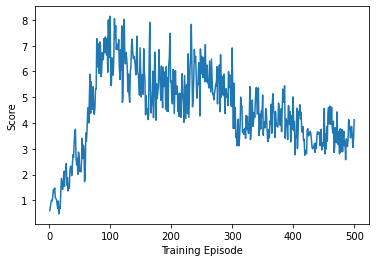

In [4]:
# visualize the training progress
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), np.mean(scores, axis=-1))
plt.ylabel('Score')
plt.xlabel('Training Episode')
plt.show()

When finished, you can close the environment.

In [7]:
# visualize trained agent
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(1)                          # initialize the score (for each agent)
for t in range(300):
    actions = agent.act(states[0]) # select an action (for each agent)
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.09999999776482582


In [12]:
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(1)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(1, 4) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.03999999910593033


In [7]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```